# Tutorial: How to train a rnn using grainlearning.rnn

## ⚙️ Install grainlearning package
(Not necessary if you are running jupyter-lab on an environment where grainlearning and rnn dependencies are installed)

In [ ]:
%pip install grainlearning[rnn]

We define a dictionary `my_config` containing the values of several parameters that are needed for preparing the data, creating the RNN model and training it. Extensive lists of the keywords and the meaning of the values for [preparing data]() and [preparing model and training](https://grainlearning.readthedocs.io/en/latest/api.html#grainlearning.rnn.train.get_default_config).

In [6]:
# dictionary with the configuration of the training
my_config = {
        'raw_data': '../data/triaxial_compression_variable_input.hdf5',
        'pressure': 'All',
        'experiment_type': 'drained',
        'add_pressure': True,
        'add_e0': True,
        'train_frac': 0.7,
        'val_frac': 0.15,
        'window_size': 20,
        'window_step': 1,
        'patience': 25,
        'epochs': 10,
        'learning_rate': 1e-4,
        'lstm_units': 250,
        'dense_units': 250,
        'batch_size': 256,
        'standardize_outputs': True,
        'save_weights_only': True
    }

Creating a preprocessor of the data. We choose the preprocessor that is tailored for triaxial compression experiments.

In [7]:
from grainlearning.rnn import preprocessor
preprocessor_TC = preprocessor.PreprocessorTriaxialCompression(**my_config)

No add_experiment_type specified in config, using default True.
No pad_length specified in config, using default 0.


In [8]:
import grainlearning.rnn.train as train_rnn
history_simple = train_rnn.train_without_wandb(preprocessor_TC, config=my_config)

No pad_length specified in config, using default 0.
2025-04-29 11:23:14.352410: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/10


2025-04-29 11:23:14.593139: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2214/2214 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - loss: 0.5034 - mae: 0.4908 - val_loss: 0.1127 - val_mae: 0.2161
Epoch 2/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 161s 73ms/step - loss: 0.1037 - mae: 0.2040 - val_loss: 0.0899 - val_mae: 0.1851
Epoch 3/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 160s 72ms/step - loss: 0.0769 - mae: 0.1684 - val_loss: 0.0745 - val_mae: 0.1612
Epoch 4/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 160s 72ms/step - loss: 0.0693 - mae: 0.1579 - val_loss: 0.0674 - val_mae: 0.1518
Epoch 5/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 164s 74ms/step - loss: 0.0577 - mae: 0.1438 - val_loss: 0.0489 - val_mae: 0.1208
Epoch 6/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 158s 71ms/step - loss: 0.0398 - mae: 0.1179 - val_loss: 0.0359 - val_mae: 0.0969
Epoch 7/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 162s 73ms/step - loss: 0.0277 - mae: 0.0964 - val_loss: 0.0287 - val_mae: 0.0835
Epoch 8/10
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 160s 72ms/step - loss: 0.0225 - mae: 0.0851 - val_loss: 0.0251 - val_mae: 0.0774
Epoch 9/10
2214/2214 ━━━━━━

You have trained your first model! 🥳️

Note that we have only ran 10 epochs, you can change that in the config dictionary that we defined.

### 📉 Plot the training history 

⚙️ First, install dependencies for ploting on jupyter notebooks

`pip install matplotlib`

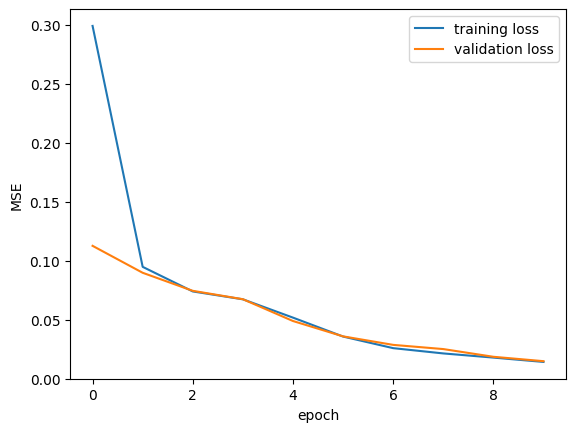

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(history_simple.history['loss'], label='training loss')
plt.plot(history_simple.history['val_loss'], label='validation loss')
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.legend()